### Problem 1: Root Finding
a. Implement the (a) bisection, (b) Newton-Raphson, and (c) secant methods to solve the generic problem $f(x) = 0$, by writing functions that take the function $f$ (and possibly its derivative) and one or two initial $x$ values as parameters. In each case start with reasonable guesses at the $x$ values.  

b. Make a plot comparing the convergence rates of the three methods on the simple function $f_c(x) = \sin(x) - c$, with $c = 0.5$. The $x$ axis should be the number of iterations $N$, and the $y$ axis should be the difference between $f$ and zero on a logarithmic scale.  

c. For each method, write out the $x$ value, the residual error $f(x)$, and the iteration number at each step. 
Keep iterating until $f(x)=0$ to the machine precision or a maximum number of iterations $N_{max}=100$ is reached.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math, random
import scipy.optimize


def f1(x):
    return np.sin(x)

def f1_prime(x):
    return np.cos(x)

In [87]:
def bisection(f, x1, x2, N=100, e=10**-10):
    y = [ ]
    for i in range(N):
        x0 = (x1 + x2) / 2
        y.append(abs(f(x0)))
        if np.sign(f(x0)) == np.sign(f(x1)):
            (x1, x2) = (x0, x2)
        else:
            (x1, x2) = (x1, x0)
        if abs(y[i]) < e:
            break
    
    print('root =', x0)
    return y, i

# The only root in [2, 5] for sin(x) is x = pi
bisection(f1, 2, 5)
    

root = 3.141592653642874


([0.35078322768961984,
  0.38166099205233173,
  0.016591892229347906,
  0.17007654610249431,
  0.077080812954327782,
  0.030277718366983942,
  0.0068447929612965195,
  0.0048738842932713527,
  0.00098547125069936873,
  0.0019442148649450443,
  0.00047937232143345065,
  0.00025304953250612972,
  0.00011316140205172368,
  6.9944066399731802e-05,
  2.1608667916556824e-05,
  2.4167699266908901e-05,
  1.2795156755111882e-06,
  1.0164576121188431e-05,
  4.4425302229113498e-06,
  1.5815072737065534e-06,
  1.5099579909783707e-07,
  5.6425993820681991e-07,
  2.0663206955450465e-07,
  2.781813522833423e-08,
  6.1588831934751672e-08,
  1.6885348353208736e-08,
  5.4663934375627469e-09,
  5.7094774578229953e-09,
  1.2154201013012384e-10,
  2.6724257137163117e-09,
  1.275441851793094e-09,
  5.7694992083148507e-10,
  2.277039553506806e-10,
  5.308097261027837e-11],
 33)

In [84]:
def newton_raphson(f, f_prime, x, N=100, e=10**-10):
    y = [ ]
    
    for i in range(N):
        y.append(abs(f(x)))
        x -= f(x) / f_prime(x)
        
        if abs(y[i]) < e:
            break
            
    print('root =', x)
    return y, i+1

# The nearest root of sin(x) to x = 4 is x = pi
newton_raphson(f1, f1_prime, 4)

root = 3.14159265359


([0.7568024953079282,
  0.29496026755998517,
  0.0092801528873719223,
  2.6642673457455806e-07,
  1.2246467991473532e-16],
 4)

In [68]:
def secant(f, x1, x2, N=100, e=10**-10):
    y = []
    for i in range (N):
        x2_prime = (f(x2) - f(x1)) / (x2 - x1)
        x3 = x2 - f(x2) / x2_prime

        y.append(abs(f(x3)))
        
        if abs(f(x3)) < e: 
            break
            
        x1 = x2
        x2 = x3
        
    return y, i

secant(f1, 2, 5)

([0.31320106711474027,
  0.41534644159257766,
  0.0025226797360381912,
  7.9298107656537587e-05,
  8.1464291208785257e-11],
 4)

root = 3.141592653642874
root = 3.14159265359


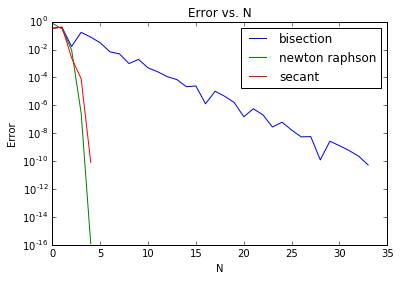

In [92]:
def plot_convergence(f):
    y1, n1 = bisection(f1, 2, 5)
    y2, n2 = newton_raphson(f1, f1_prime, 4)
    y3, n3 = secant(f1, 2, 5)
    x1 = np.array(range(n1+1))
    x2 = np.array(range(n2+1))
    x3 = np.array(range(n3+1))
    plt.plot(x1, y1, label='bisection')
    plt.plot(x2, y2, label='newton raphson')
    plt.plot(x3, y3, label='secant')
    plt.legend(loc='best')
    plt.yscale('log')
    plt.title('Error vs. N')
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.show()
    
plot_convergence(f1)
    

### Problem 2: Quantum Particle in a Square Well
Probably the most standard problem in quantum mechanics is to solve for the energies of a particle of mass $m$ bound within a 1-D square well of radius $a$:
$$
V(x)=
\begin{cases}
-V_0 & \text{if $|x|\leq a$,} \\
0 &\text{if $|x|\geq a$.}
\end{cases}
$$
As shown in quantum mechanics texts, the energies of the bound states $E = -E_B < 0$ within this well are solutions of the transcendental equations:
$$
\sqrt{V_0 - E_B} \tan\left(\sqrt{V_0-E_B}\right) = \sqrt{E_B} \;\;\;\;\;\; \textrm{(even)}
$$ 
$$
\sqrt{V_0 - E_B} \cot\left(\sqrt{V_0-E_B}\right) = \sqrt{E_B} \;\;\;\;\;\; \textrm{(odd)}
$$ 
where even and odd refer to the symmetry of the wave function. Here we have chosen units such that $\hbar = 1$, $2m = 1$, and $a = 1$. Your problem is to:

a. Rewrite the even equation in the form $f(E_B)=0$ so it can be solved by finding the roots of $f(E_B)$. Write a function that plots $f(E_B)$ with $N$ points over a user-specified range. Include plots in your solutions for $V_0 = 10$, $V_0 = 20$, and $V_0 = 30$ showing all the roots for $E_B>0$. Note that the higher $V_0$, the deeper the well. Why is it important to make a plot before trying to find roots? Hint: to show the roots, try plotting $f(E_B)$ with a blue line and $-f(E_B)$ with a red line on the same plot. Use $N \sim 1000$ plot points and a fixed $y$ range so you can see where the red and blue lines cross (which happens at the roots).

b. Write a function that finds solutions to the even equation with a given $V_0$ by bisection given two range endpoints and a requested limit of the residual value $e$. Include the range endpoints chosen, the result, and the number of steps required for each of the roots in your solutions, with $e=10^{-6}$ and $V_0 = 30$. Print out the range limits, the current best estimate, the error, and the iteration number at each step. How could the normally robust bisection algorithm run into difficulties in this problem if you didn't plot the function first?

c. Write a function that finds solutions to the even equation with a given $V_0$ by the secant method given a starting point and a requested limit of the residual value $e$. Include the starting point chosen, the result, and the number of steps required for the each of the roots in your solutions, with $e=10^{-6}$ and $V_0 = 30$. Print the current best estimate, the error, and the iteration number at each step. Make sure you get the same results as in part (b).



C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


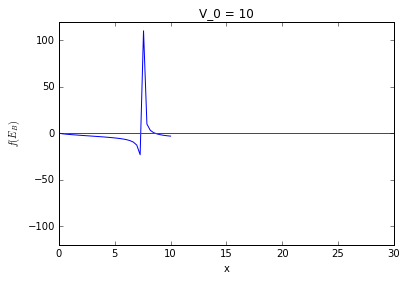

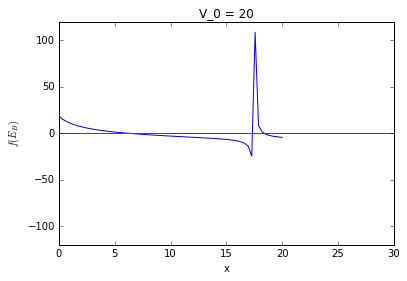

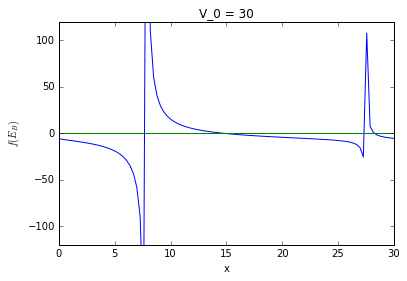

x1, x2, current root estimate, iteration
7 8.5 8.5 0
7 7.75 7.75 1
7.375 7.75 7.375 2
7.375 7.5625 7.5625 3
7.46875 7.5625 7.46875 4
7.515625 7.5625 7.515625 5
7.515625 7.5390625 7.5390625 6
7.52734375 7.5390625 7.52734375 7
7.52734375 7.533203125 7.533203125 8
7.5302734375 7.533203125 7.5302734375 9
7.53173828125 7.533203125 7.53173828125 10
7.532470703125 7.533203125 7.532470703125 11
7.532470703125 7.5328369140625 7.5328369140625 12
7.532470703125 7.53265380859375 7.53265380859375 13
7.532562255859375 7.53265380859375 7.532562255859375 14
7.532562255859375 7.5326080322265625 7.5326080322265625 15
7.532585144042969 7.5326080322265625 7.532585144042969 16
7.532596588134766 7.5326080322265625 7.532596588134766 17
7.532596588134766 7.532602310180664 7.532602310180664 18
7.532596588134766 7.532599449157715 7.532599449157715 19
7.53259801864624 7.532599449157715 7.53259801864624 20
7.5325987339019775 7.532599449157715 7.5325987339019775 21
7.5325987339019775 7.532599091529846 7.5325990915

In [125]:
# Make sure it works for both scalars and arrays
def V(x, V_0, a=1):
    return -V_0 * (np.abs(x) < a)

def x_axis(x):
    return np.zeros(len(x))

def square_well_even(E_B, V_0):
    return np.sqrt(V_0 - E_B) * np.tan(np.sqrt(V_0 - E_B)) - np.sqrt(E_B)

def square_well_odd(E_B, V_0):
    return np.sqrt(V_0 - E_B) * np.cot(np.sqrt(V_0 - E_B)) - np.sqrt(E_B)
    
def plot_fEB(N, xi, xf, V_0=10):
    x = np.linspace(xi, xf, N)
    plt.plot(x, square_well_even(x, V_0), label=r'$V_0$ = %3g' % V_0)
    plt.plot(x, x_axis(x), label='x axis')
    plt.xlabel('x')
    plt.ylabel(r'$f(E_B)$')
    plt.title('V_0 = ' + str(V_0))
    plt.ylim(-120, 120)
    plt.show()

def well_bisection(V_0, x1, x2, N=100, e=10**-10):
    y = [ ]
    for i in range(N):
        x0 = (x1 + x2) / 2
        y.append(abs(square_well_even(x0, V_0)))
        if np.sign(square_well_even(x0, V_0)) == np.sign(square_well_even(x1, V_0)):
            (x1, x2) = (x0, x2)
        else:
            (x1, x2) = (x1, x0)
        if abs(y[i]) < e:
            break
        print(x1, x2, x0, i)
    
    print('V_0 =', V_0, 'root =', x0)
    
def well_secant(V_0, x1, x2, N=100, e=10**-10):
    y = []
    for i in range (N):
        x2_prime = (square_well_even(x2, V_0) - square_well_even(x1, V_0)) / (x2 - x1)
        x3 = x2 - square_well_even(x2, V_0) / x2_prime

        y.append(abs(square_well_even(x3, V_0)))
        
        if abs(square_well_even(x3, V_0)) < e: 
            break
            
        x1 = x2
        x2 = x3
        
        print(x1, x2, x3, i)
    print('V_0 =', V_0, 'root =', x3)

plot_fEB(100, 0, 30, 10)
plot_fEB(100, 0, 30, 20)
plot_fEB(100, 0, 30, 30)
print('x1, x2, current root estimate, iteration')
print('Bisection method')
well_bisection(10, 7, 10)
well_bisection(20, 5, 10)
well_bisection(30, 10, 20)
print('Secant method')
well_secant(10, 7, 8)
well_secant(20, 5, 10)
well_secant(30, 10, 20)
    

### Problem 3: Writing and Reading Array Files
Write data to files is a fundamental part of analysis.  Obviously raw data must be recorded in some format, but additionally many intermediate data products from the analysis are useful to store in files: this is both useful for storing data between Python sessions and for sharing data with other researchers.

We will here use the straightforward `numpy.loadtxt` and `numpy.savetxt`.  There are more flexible and powerful packages for storing complicated data structures such as `hdf5` and, field-specific packages such as astronomy's `astropy.io` (e.g., `astropy.io.ascii` and `astropy.io.fits`), but we'll start with the simplest facilities provided by `numpy`.

A. Copy the part of the function which simulated radioactive decay in Problem Set 3, problem 5. Use it to generate and plot a 2-D array of data with $t$ as the first column and $\Delta N(t)$ as the second column,  starting with $N(0)=100,000$ and probability of decay$\lambda = 0.05$ per second from $t=0$ to $t=100$ s (each step gives $\Delta t = 1$ s).
 * Plot the decay rate $\Delta N(t)$ over time on a semilog plot.
 * Write the array of data to a text file named `data_6_4.csv` with the `numpy.savetxt` method. The file should use a comma as the separation character and the data should be written as two columns of integers.
 * Check the contents of the file with a text editor to make sure it is formatted correctly.

B. Read the `data_6_4.csv` file that you created above into a new array with the `numpy.loadtxt` command.
 * Output the difference between the original array and the array read from the file to show that it was read in accurately.
 * Plot the decay rate $\Delta N(t)$ over time using the read-in data on a semi-log plot.

Saved Data:
 [[   0    0]
 [   1 4965]
 [   2 4909]
 [   3 4511]
 [   4 4382]
 [   5 4123]
 [   6 3931]
 [   7 3653]
 [   8 3410]
 [   9 3471]
 [  10 3132]
 [  11 2941]
 [  12 2784]
 [  13 2728]
 [  14 2554]
 [  15 2537]
 [  16 2267]
 [  17 2186]
 [  18 2036]
 [  19 1942]
 [  20 1907]
 [  21 1795]
 [  22 1628]
 [  23 1619]
 [  24 1472]
 [  25 1505]
 [  26 1411]
 [  27 1265]
 [  28 1240]
 [  29 1162]
 [  30 1120]
 [  31 1068]
 [  32 1048]
 [  33  927]
 [  34  930]
 [  35  878]
 [  36  843]
 [  37  772]
 [  38  750]
 [  39  676]
 [  40  670]
 [  41  611]
 [  42  615]
 [  43  599]
 [  44  548]
 [  45  502]
 [  46  502]
 [  47  438]
 [  48  438]
 [  49  409]
 [  50  434]
 [  51  380]
 [  52  351]
 [  53  363]
 [  54  350]
 [  55  331]
 [  56  272]
 [  57  275]
 [  58  325]
 [  59  254]
 [  60  230]
 [  61  234]
 [  62  263]
 [  63  193]
 [  64  195]
 [  65  177]
 [  66  167]
 [  67  166]
 [  68  163]
 [  69  148]
 [  70  128]
 [  71  138]
 [  72  113]
 [  73  118]
 [  74  105]
 [  75  132]

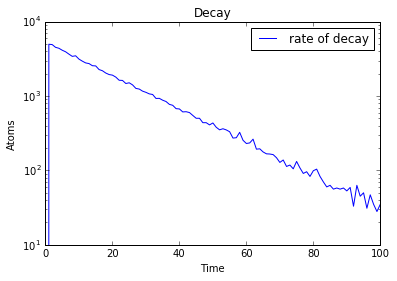

In [19]:
def decay_simulation(n, rate):
    atoms = [n]
    atoms_decayed = [0]
    time = [0]
    t = 0
    
    while t < 100:
        decay_count = 0
        
        for i in range(n):
            r_i = random.uniform(0, 1)
            
            if r_i < rate:
                n -=1
                decay_count += 1

        atoms.append(n)
        atoms_decayed.append(decay_count)
        t += 1
        time.append(t)
        
    data = np.column_stack([time, atoms_decayed])
    np.savetxt('data_6_4.csv', data, delimiter=' , ')
    
    return data
    
def read_data(filename):
    time, atoms_decayed = np.loadtxt(filename, delimiter=' , ', unpack=True)
    read_data = np.column_stack([time, atoms_decayed])
    
    print('Read Data:\n', read_data)
    print('Compare Saved and Read Data:\n', read_data == saved_data)

    plt.plot(time, atoms_decayed, label='rate of decay')
    plt.yscale('log')
    plt.title('Decay')
    plt.xlabel('Time')
    plt.ylabel('Atoms')
    plt.legend(loc='best')
    plt.show()
      
saved_data = decay_simulation(100000, 0.05)
print('Saved Data:\n', saved_data)

read_data('data_6_4.csv')



### Problem 4: Nonlinear Curve Fitting
Write a function to fit the data generated in the previous problem to an exponential function. Start by reading the data from the `data_6_4.csv` file into an array. Imagine that this data represents nuclear decay, and $\Delta N(t)$ is the number of decay events detected in $\Delta t = 1$ second.

A. Fit the natural logarithm of the data to a line with $\sigma_i = 1$, using the `numpy.linalg.lstsq` function, i.e.

$$
\ln \left| \frac{\Delta N(t)}{\Delta t}\right| = \ln \left| \frac{\Delta N(0)}{\Delta t}\right| - \frac{1}{\tau} t
$$

The fit results will give you $\ln \left| \frac{\Delta N(0)}{\Delta t}\right|$ and $- \frac{1}{\tau}$. Plot $\ln{(\Delta N(t))}$ vs. $t$ as points and the fit as a line on a linear scale. Compare the fitted value of the decay rate $\lambda = \frac{1}{\tau}$ to that you used to generate the data in the problem above.

B. Fit the data with $\sigma_i = \sqrt{\Delta N_i}$ directly to an exponential function

$$
\left| \frac{\Delta N(t)}{\Delta t}\right| = \left| \frac{\Delta N(0)}{\Delta t}\right| e^{-t/\tau}
$$

using `scipy.optimize.curve_fit` and fit parameters $\tau$ and $\left| \frac{\Delta N(0)}{\Delta t}\right|$.  

* Plot your data as points and plot the fit curve on `plot` as lines, all on a semilog scale (the fit and data should look linear on the semilog plot). 

* Print and compare the fitted value and $\sigma$ of the number of initial decays $\left| \frac{\Delta N(0)}{\Delta t}\right|$ and the decay rate $\lambda = \frac{1}{\tau}$ to those you expect from the parameters used to generate the data in problem 3 and the fit values from part (a) of this problem.

------

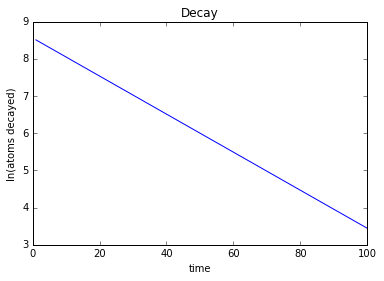

Actual decay rate: 0.05
Fitted decay rate: 0.0511743563696


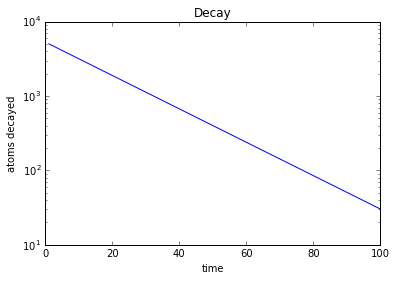

Fitted decay rate: 0.0516275778227
Fitted sqrt(N): 72.7283675628


In [112]:
def model_f(x, C, T):
    return C*np.exp(-x/T)

def curve_fit(filename, f):
    data = np.loadtxt(filename, delimiter=' , ', unpack=True)
    x = list(data[0])
    y = list(data[1])
    del x[0]
    del y[0]
    x = np.array(x)
    y = np.log(np.array(y))
    
    # This is how many data pairs we have. We need it to make the coefficient matrix.
    A = len(x) 

    coeff_matrix = np.vstack([x, np.ones(A)]).T
    
    # Coefficients for the linear fit y = mx + b
    m ,b = np.linalg.lstsq(coeff_matrix, y)[0]
    
    y_fit = m*x + b
    
    plt.plot(x, y_fit, label='Linear Fit')
    plt.xlabel('time')
    plt.ylabel('ln(atoms decayed)')
    plt.title('Decay')
    plt.show()
    
    print('Actual decay rate:', 0.05)
    print('Fitted decay rate:', -m)
    
    y_new = np.exp(y)
    r = scipy.optimize.curve_fit(model_f, x, y_new, sigma=np.sqrt(y_new))
    popt, pcov = r
    c, t = r[0]
    
    plt.plot(x, model_f(x, c, t), label='Curve Fit')
    plt.xlabel('time')
    plt.ylabel('atoms decayed')
    plt.title('Decay')
    plt.yscale('log')
    plt.show()

    print('Fitted decay rate:', 1/popt[1])
    print('Fitted sqrt(N):', np.sqrt(popt[0]))
    

curve_fit('data_6_4.csv', model_f)